# *OPEN CV Begining*

To connect google colab with google drive in order to access the images from the drive


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Access the folder with images in the drive


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Image and Video class')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/Colab Notebooks/Image and Video class
/content/gdrive/My Drive/Colab Notebooks/Image and Video class


Importing the libraries, matplotlib is used to show the image, argparse is to use the commands as arguments if we want to access the commands during runtime, cv2 is to import all the open cv functions.


In [ ]:
from matplotlib import pyplot as plt
import argparse
import cv2

If the grid is True then the image will come in grid form, and if grid is False then the image will come in normal form

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(True)
	plt.show()



Here we write the image name inside the arguments


In [ ]:
args = {
	"image": "money heist.jpg",
}

we are calling the image with 3d and checking the number of pixes in the width i.e columns and the number of pixels in height i.e rows. The number of channels will be dependent on RGB or grey scalw if it is rgb then it will be 3 channel. 2 if it is grey scale


In [ ]:
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

In [ ]:
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 1200 pixels
height: 675  pixels
channels: 3


To show the image

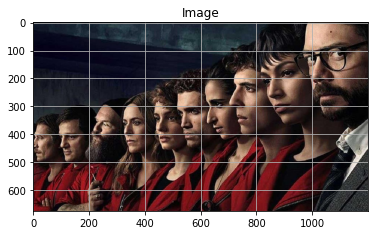

In [ ]:
plt_imshow("Image", image)

To rewrite the name of the image here we converted a jpg file to png file.

In [ ]:
cv2.imwrite("heistmem.png", image)

True

Here we checking the RGB values for certain pixels. Here we mention the coordinates (x,y) and locate the pixels. We can chnage the pixel values.



In [ ]:
(b,g,r)=image[0,0]
print("Pixel at (0,0) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

Pixel at (0,0) - Red: 18, Green: 27, Blue: 42


In [ ]:
(b,g,r)=image[20,50]
print("Pixel at (50,20) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

Pixel at (50,20) - Red: 17, Green: 23, Blue: 39


In [ ]:
image[200,500]=(255,255,255)
(b,g,r)=image[200,500]
print("Pixel at (50,20) - Red: {}, Green: {}, Blue: {}".format(r,g,b))

Pixel at (50,20) - Red: 255, Green: 255, Blue: 255


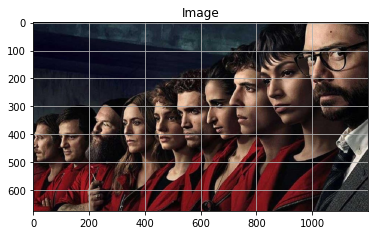

In [ ]:
plt_imshow("Image",image)

compute the center of the image, which is simply the width and height divided by two. since we are using NumPy arrays, we can apply array slicing to grab large chunks/regions of interest from the image -- here we grab the top-left corner of the image

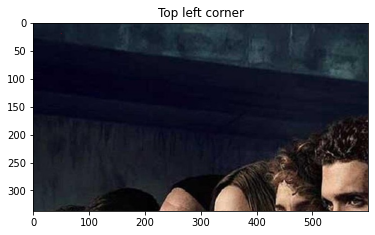

In [ ]:
(cx,cy)=(w//2,h//2)
t1=image[0:cy,0:cx]
plt_imshow("Top left corner", t1)

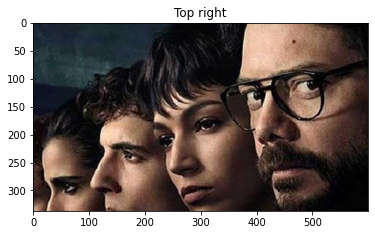

In [ ]:
t2=image[0:cy,cx:w]
t3=image[cy:h,0:cx]
t4=image[cy:h,cx:w]
plt_imshow("Top right", t2)

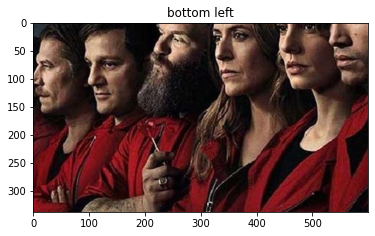

In [ ]:
plt_imshow("bottom left", t3)

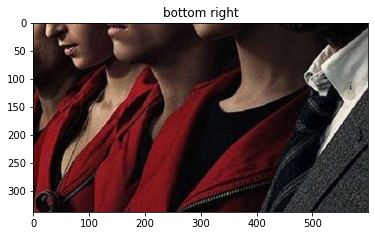

In [ ]:
plt_imshow("bottom right", t4)

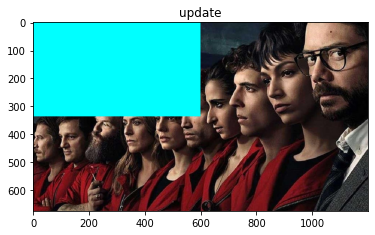

In [ ]:
image[0:cy,0:cx]=(255,255,0)
plt_imshow("update", image)

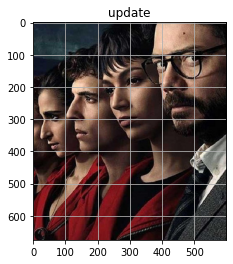

In [ ]:
t=image[0:900,cx:w]
plt_imshow("update", t)

For beging more clear we can say that [height, width]

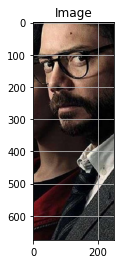

In [ ]:
a=image[0:675,950:1200]
plt_imshow("Image",a)

Initialize our canvas as a 300x300 pixel image with 3 channels
(Red, Green, and Blue) with a black background

In [ ]:
import numpy as np
canvas=np.zeros((300,300,3),dtype='uint8')

Drawing a green line from the top-left corner of our canvas to the
bottom-right

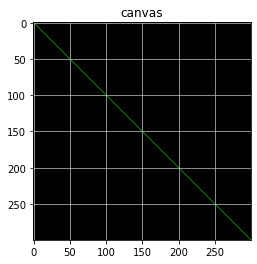

In [ ]:
green=(0,255,0)
cv2.line(canvas, (0,0), (300,300), green)
plt_imshow("canvas",canvas)

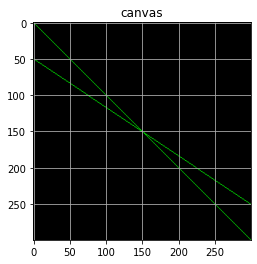

In [ ]:
cv2.line(canvas, (0,50), (300,250), green)
plt_imshow("canvas",canvas)

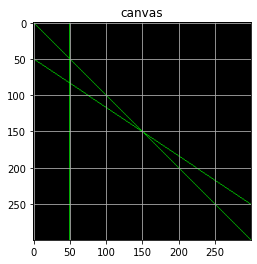

In [ ]:
cv2.line(canvas, (50,0), (50,300), green)
plt_imshow("canvas",canvas)

Drawing a 3 pixel thick red line from the top-right corner to the
bottom-left

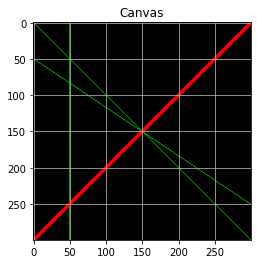

In [ ]:
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

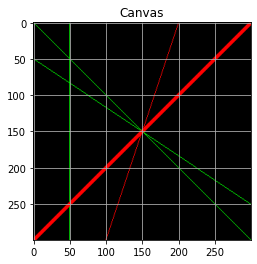

In [ ]:
cv2.line(canvas, (200, 0), (100, 300), red)
plt_imshow("Canvas", canvas)

Drawing a green 50x50 pixel square, starting at 10x10 and ending at 60x60

Drawing another rectangle, this one red with 5 pixel thickness

Drawing another rectangle (blue and filled in )

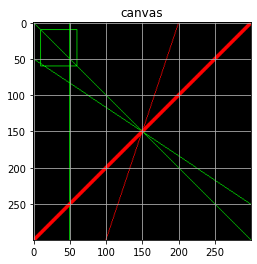

In [ ]:
cv2.rectangle(canvas, (10,10), (60,60), green)
plt_imshow("canvas",canvas)

In [ ]:
canvas1=np.zeros((300,300,3),dtype='uint8')

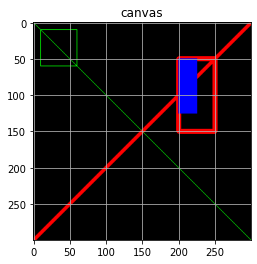

In [ ]:
blue=(255,0,0)
cv2.line(canvas1,(0,0),(300,300),green)
cv2.line(canvas1,(300,0),(0,300),red,3)
cv2.rectangle(canvas1,(10,10),(60,60),green)
cv2.rectangle(canvas1,(200,50),(250,150),red,5)
cv2.rectangle(canvas1, (200, 50), (225, 125), blue, -1)
plt_imshow("canvas",canvas1)

Re-initialize our canvas as an empty array, then compute the

In [ ]:
canvas=np.zeros((300,300,3),dtype='uint8')


loop over increasing radii, from 25 pixels to 150 pixels in 25
pixel increments. center (x, y)-coordinates of the canvas

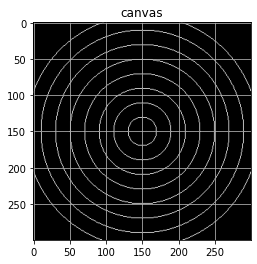

In [ ]:
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0,165,20):
  cv2.circle(canvas,(centerX,centerY),r,white)

plt_imshow("canvas",canvas)

let's draw 25 random circles, randomly generate a radius size between 5 and 200, generate a

Random color, and then pick a random point on our canvas where the circle will be drawn

In [ ]:
canvas=np.zeros((300,300,3),dtype='uint8')

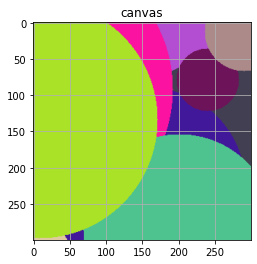

In [ ]:
for i in range(0,25):
  radius=np.random.randint(5,high=200)
  color=np.random.randint(0, high=256, size=(3,)).tolist()
  pt = np.random.randint(0, high=300, size=(2,))

  cv2.circle(canvas, tuple(pt), radius, color, -1)

plt_imshow("canvas",canvas)

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

In [ ]:
args={
    "Image":"money heist.jpg"
}

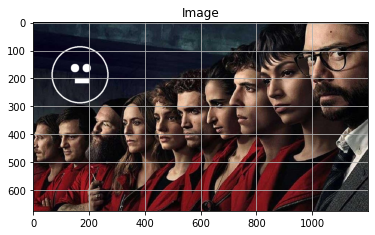

In [ ]:
image = cv2.imread(args["Image"])
cv2.circle(image, (168, 188), 100, (255, 255, 255), 3)
cv2.circle(image, (150, 164), 15, (255, 255, 255), -1)
cv2.circle(image, (192, 164), 15, (255, 255, 255), -1)
cv2.rectangle(image, (150, 200), (200, 218), (255, 255, 255), -1)

plt_imshow("Image",image)